In [ ]:
import random
from itertools import *
import pandas as pd
import numpy as np

# Сколько вариантов игры в крестики-нолики?

## Варианты заполнения.

Можно сказать что число возможных игр 9! = 362880 (Первый игрок может поставить в любую из 9 клеток, второй игрок в любую из 8 клеток и так далее).

Рассмотрим все такие варианты.

Для удобства, игры будут записываться в формате строки, а не матрицы.

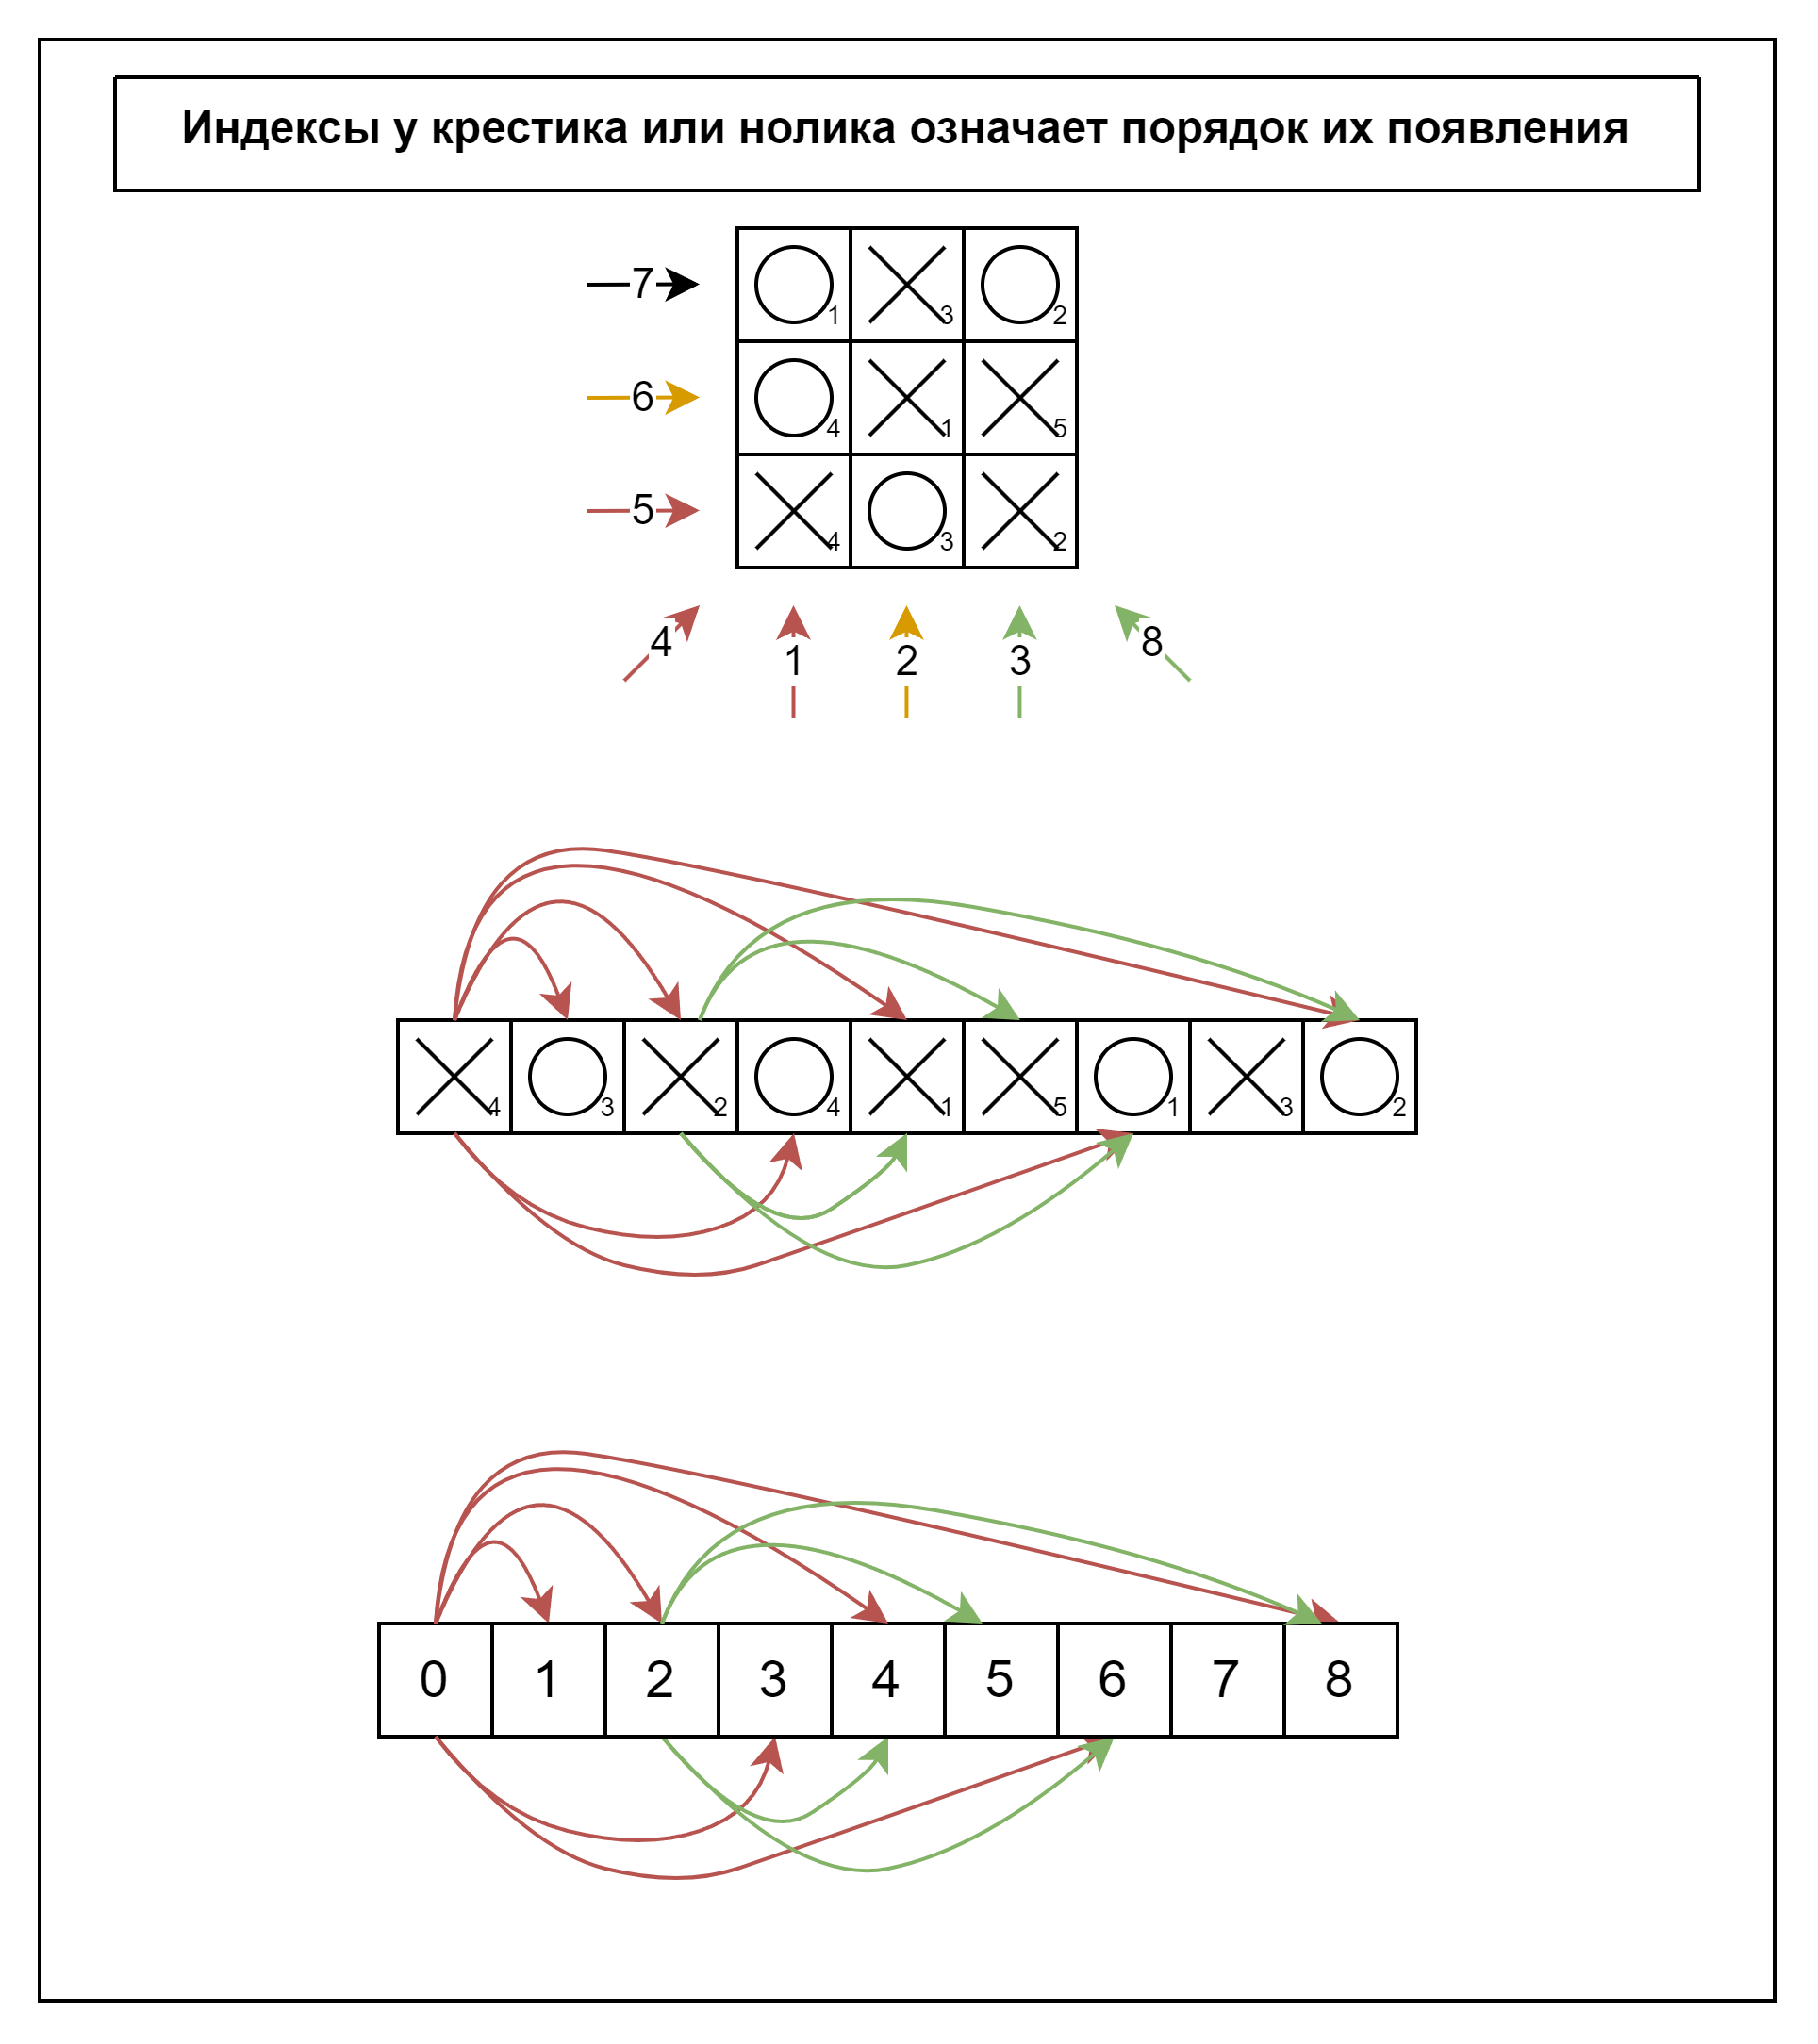

In [ ]:
all_games = []
for i in permutations('123456789'):
  all_games.append(list(i))

df_all_game = pd.DataFrame(all_games, columns=['index_'+str(i) for i in range(1,10)])

Каждая строка, предтавляет собой вариант заполнения строки длинной 9 (матрица 3 на 3 для игры). Цифра в каждом столбце, означает ход на котором данная клетка была заполнена (нечётный - крестики, четные - нолики).

Рассмотрим пример в котором при игре за крестики собралась линия в нижней части матрицы за первые 5 ходов (три хода за крестики и два хода за нолики). Допустим что игрок за нолики хотел собрать горизонталь по центру.

In [ ]:
df_all_game[(df_all_game['index_1']=='1') & (df_all_game['index_2']=='3') & (df_all_game['index_3']=='5')
            & (df_all_game['index_4']=='2') & (df_all_game['index_5']=='4')]

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9
6480,1,3,5,2,4,6,7,8,9
6481,1,3,5,2,4,6,7,9,8
6482,1,3,5,2,4,6,8,7,9
6483,1,3,5,2,4,6,8,9,7
6484,1,3,5,2,4,6,9,7,8
6485,1,3,5,2,4,6,9,8,7
6486,1,3,5,2,4,7,6,8,9
6487,1,3,5,2,4,7,6,9,8
6488,1,3,5,2,4,7,8,6,9
6489,1,3,5,2,4,7,8,9,6


Видно что после победы крестиков у нас продолжается игра, хотя он не имеет смысла. Какая разница куда походится игрок за нолик на 6 ходу если игра окончена?

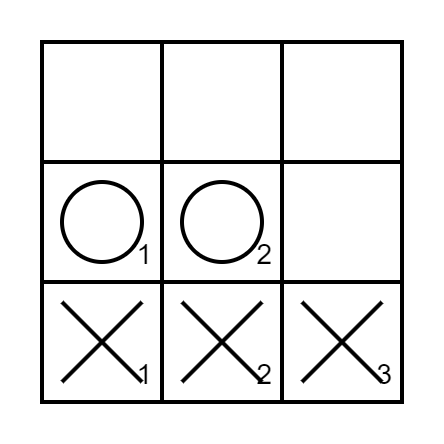

Видно что ответ 9! не отвечает на вопрос про количество вариантов игры в крестики-нолики. Это ответ на вопрос "Сколько существует вариантов заполнения матрицы 3х3".

## Окончания игры за определенное количество ходов.

In [ ]:
def win_in_row(game_row):
  if int(game_row[0])%2 == int(game_row[1])%2 == int(game_row[2])%2  and int(game_row[0])!=0 and int(game_row[1])!=0 and int(game_row[2])!=0\
    or int(game_row[0])%2 == int(game_row[4])%2 == int(game_row[8])%2 and int(game_row[0])!=0 and int(game_row[4])!=0 and int(game_row[8])!=0\
    or int(game_row[0])%2 == int(game_row[3])%2 == int(game_row[6])%2 and int(game_row[0])!=0 and int(game_row[3])!=0 and int(game_row[6])!=0:
    return 1

  if int(game_row[2])%2 == int(game_row[4])%2 == int(game_row[6])%2 and int(game_row[2])!=0 and int(game_row[4])!=0 and int(game_row[6])!=0\
    or int(game_row[2])%2 == int(game_row[5])%2 == int(game_row[8])%2 and int(game_row[2])!=0 and int(game_row[5])!=0 and int(game_row[8])!=0:
    return 1

  if int(game_row[1])%2 == int(game_row[4])%2 == int(game_row[7])%2 and int(game_row[1])!=0 and int(game_row[4])!=0 and int(game_row[7])!=0\
    or int(game_row[3])%2 == int(game_row[4])%2 == int(game_row[5])%2 and int(game_row[3])!=0 and int(game_row[4])!=0 and int(game_row[5])!=0:
    return 1

  if int(game_row[6])%2 == int(game_row[7])%2 == int(game_row[8])%2 and int(game_row[6])!=0 and int(game_row[7])!=0 and int(game_row[8])!=0:
    return 1
  return 0


###Окончание игры за 5 ходов

In [ ]:
df_win5_move = df_all_game.copy()
for i in range(1,10):
  df_win5_move['index_'+str(i)] = np.where(df_win5_move['index_'+str(i)].isin(['1','2','3','4','5']), df_win5_move['index_'+str(i)], '0')

df_win5_move['win_5_move']= (df_win5_move['index_1'] + df_win5_move['index_2'] + df_win5_move['index_3']
                             + df_win5_move['index_4'] + df_win5_move['index_5'] + df_win5_move['index_6']
                             + df_win5_move['index_7'] + df_win5_move['index_8'] + df_win5_move['index_9']).apply(lambda x:win_in_row(x))

df_win5_move = df_win5_move[df_win5_move['win_5_move']==1]
df_win5_move.drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_5_move
750,1,2,4,3,0,0,5,0,0,1
870,1,2,4,5,0,0,3,0,0,1
969,1,2,4,0,3,0,0,0,5,1
993,1,2,4,0,5,0,0,0,3,1
2166,1,2,0,3,4,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...
231079,0,0,0,0,4,2,1,5,3,1
231080,0,0,0,0,4,2,3,1,5,1
231081,0,0,0,0,4,2,3,5,1,1
231082,0,0,0,0,4,2,5,1,3,1


###Окончание игры за 6 ходов

In [ ]:
df_win6_move = df_all_game.copy()
for i in range(1,10):
  df_win6_move['index_'+str(i)] = np.where(df_win6_move['index_'+str(i)].isin(['1','2','3','4','5','6']), df_win6_move['index_'+str(i)], '0')

df_win6_move['win_6_move']= (df_win6_move['index_1'] + df_win6_move['index_2'] + df_win6_move['index_3']
                             + df_win6_move['index_4'] + df_win6_move['index_5'] + df_win6_move['index_6']
                             + df_win6_move['index_7'] + df_win6_move['index_8'] + df_win6_move['index_9']).apply(lambda x:win_in_row(x))

df_win6_move = df_win6_move[df_win6_move['win_6_move']==1]
df_win6_move.drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_6_move
128,1,2,3,5,4,0,0,6,0,1
152,1,2,3,5,6,0,0,4,0,1
362,1,2,3,0,4,5,0,6,0,1
372,1,2,3,0,4,0,5,6,0,1
377,1,2,3,0,4,0,0,6,5,1
...,...,...,...,...,...,...,...,...,...,...
277159,0,0,0,6,4,2,1,5,3,1
277160,0,0,0,6,4,2,3,1,5,1
277161,0,0,0,6,4,2,3,5,1,1
277162,0,0,0,6,4,2,5,1,3,1


Еще нужно вычесть игры которые закончились за 5 ходов.

In [ ]:
df_win6_move[~df_win6_move.index.isin(df_win5_move.index)].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_6_move
128,1,2,3,5,4,0,0,6,0,1
152,1,2,3,5,6,0,0,4,0,1
362,1,2,3,0,4,5,0,6,0,1
372,1,2,3,0,4,0,5,6,0,1
377,1,2,3,0,4,0,0,6,5,1
...,...,...,...,...,...,...,...,...,...,...
276453,0,0,6,0,4,5,2,3,1,1
276462,0,0,6,0,5,2,1,3,4,1
276464,0,0,6,0,5,2,3,1,4,1
276475,0,0,6,0,5,4,1,3,2,1


###Окончание игры за 7 ходов

In [ ]:
df_win7_move = df_all_game.copy()
for i in range(1,10):
  df_win7_move['index_'+str(i)] = np.where(df_win7_move['index_'+str(i)].isin(['1','2','3','4','5','6','7']), df_win7_move['index_'+str(i)], '0')

df_win7_move['win_7_move']= (df_win7_move['index_1'] + df_win7_move['index_2'] + df_win7_move['index_3']
                             + df_win7_move['index_4'] + df_win7_move['index_5'] + df_win7_move['index_6']
                             + df_win7_move['index_7'] + df_win7_move['index_8'] + df_win7_move['index_9']).apply(lambda x:win_in_row(x))

df_win7_move = df_win7_move[df_win7_move['win_7_move']==1]
df_win7_move.drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_7_move
0,1,2,3,4,5,6,7,0,0,1
3,1,2,3,4,5,6,0,0,7,1
13,1,2,3,4,5,0,6,0,7,1
14,1,2,3,4,5,0,7,6,0,1
15,1,2,3,4,5,0,7,0,6,1
...,...,...,...,...,...,...,...,...,...,...
322553,0,0,7,6,5,3,4,2,1,1
322554,0,0,7,6,5,4,1,2,3,1
322555,0,0,7,6,5,4,1,3,2,1
322558,0,0,7,6,5,4,3,1,2,1


Еще нужно вычесть игры которые закончились за 5 и 6 ходов

In [ ]:
df_win7_move[(~df_win7_move.index.isin(df_win6_move.index)) &
             (~df_win7_move.index.isin(df_win5_move.index))].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_7_move
0,1,2,3,4,5,6,7,0,0,1
3,1,2,3,4,5,6,0,0,7,1
13,1,2,3,4,5,0,6,0,7,1
14,1,2,3,4,5,0,7,6,0,1
15,1,2,3,4,5,0,7,0,6,1
...,...,...,...,...,...,...,...,...,...,...
322553,0,0,7,6,5,3,4,2,1,1
322554,0,0,7,6,5,4,1,2,3,1
322555,0,0,7,6,5,4,1,3,2,1
322558,0,0,7,6,5,4,3,1,2,1


###Окончание игры за 8 ходов

In [ ]:
df_win8_move = df_all_game.copy()
for i in range(1,10):
  df_win8_move['index_'+str(i)] = np.where(df_win8_move['index_'+str(i)].isin(['1','2','3','4','5','6','7','8']), df_win8_move['index_'+str(i)], '0')

df_win8_move['win_8_move']= (df_win8_move['index_1'] + df_win8_move['index_2'] + df_win8_move['index_3']
                             + df_win8_move['index_4'] + df_win8_move['index_5'] + df_win8_move['index_6']
                             + df_win8_move['index_7'] + df_win8_move['index_8'] + df_win8_move['index_9']).apply(lambda x:win_in_row(x))

df_win8_move = df_win8_move[df_win8_move['win_8_move']==1]
df_win8_move.drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_8_move
0,1,2,3,4,5,6,7,8,0,1
1,1,2,3,4,5,6,7,0,8,1
3,1,2,3,4,5,6,8,0,7,1
5,1,2,3,4,5,6,0,8,7,1
13,1,2,3,4,5,8,6,0,7,1
...,...,...,...,...,...,...,...,...,...,...
362873,0,8,7,6,5,3,4,2,1,1
362874,0,8,7,6,5,4,1,2,3,1
362875,0,8,7,6,5,4,1,3,2,1
362878,0,8,7,6,5,4,3,1,2,1


Еще нужно вычесть игры которые закончились за 5, 6 и 7 ходов

In [ ]:
df_win8_move[(~df_win8_move.index.isin(df_win6_move.index)) &
             (~df_win8_move.index.isin(df_win5_move.index)) &
             (~df_win8_move.index.isin(df_win7_move.index))].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_8_move
24,1,2,3,4,6,5,7,8,0,1
30,1,2,3,4,6,7,5,8,0,1
36,1,2,3,4,6,8,5,7,0,1
37,1,2,3,4,6,8,5,0,7,1
38,1,2,3,4,6,8,7,5,0,1
...,...,...,...,...,...,...,...,...,...,...
362745,0,8,7,5,6,2,3,4,1,1
362748,0,8,7,5,6,3,1,2,4,1
362749,0,8,7,5,6,3,1,4,2,1
362754,0,8,7,5,6,4,1,2,3,1


###Окончание игры за 9 ходов

In [ ]:
df_win9_move = df_all_game.copy()
df_win9_move['win_9_move']= (df_win9_move['index_1'] + df_win9_move['index_2'] + df_win9_move['index_3']
                             + df_win9_move['index_4'] + df_win9_move['index_5'] + df_win9_move['index_6']
                             + df_win9_move['index_7'] + df_win9_move['index_8'] + df_win9_move['index_9']).apply(lambda x:win_in_row(x))

df_draw = df_win9_move[df_win9_move['win_9_move']==0]
df_win9_move = df_win9_move[df_win9_move['win_9_move']==1]
df_win9_move

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_9_move
0,1,2,3,4,5,6,7,8,9,1
1,1,2,3,4,5,6,7,9,8,1
2,1,2,3,4,5,6,8,7,9,1
3,1,2,3,4,5,6,8,9,7,1
4,1,2,3,4,5,6,9,7,8,1
...,...,...,...,...,...,...,...,...,...,...
362875,9,8,7,6,5,4,1,3,2,1
362876,9,8,7,6,5,4,2,1,3,1
362877,9,8,7,6,5,4,2,3,1,1
362878,9,8,7,6,5,4,3,1,2,1


Еще нужно вычесть игры которые закончились за 5, 6, 7 и 8 ходов

In [ ]:
df_win9_move[(~df_win9_move.index.isin(df_win6_move.index)) &
             (~df_win9_move.index.isin(df_win5_move.index)) &
             (~df_win9_move.index.isin(df_win7_move.index)) &
             (~df_win9_move.index.isin(df_win8_move.index))]

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_9_move
2,1,2,3,4,5,6,8,7,9,1
4,1,2,3,4,5,6,9,7,8,1
6,1,2,3,4,5,7,6,8,9,1
8,1,2,3,4,5,7,8,6,9,1
10,1,2,3,4,5,7,9,6,8,1
...,...,...,...,...,...,...,...,...,...,...
362823,9,8,7,6,3,4,2,5,1,1
362866,9,8,7,6,5,2,4,1,3,1
362867,9,8,7,6,5,2,4,3,1,1
362876,9,8,7,6,5,4,2,1,3,1


Также нечьи

In [ ]:
df_draw

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_9_move
7,1,2,3,4,5,7,6,9,8,0
9,1,2,3,4,5,7,8,9,6,0
18,1,2,3,4,5,9,6,7,8,0
23,1,2,3,4,5,9,8,7,6,0
25,1,2,3,4,6,5,7,9,8,0
...,...,...,...,...,...,...,...,...,...,...
362854,9,8,7,6,4,5,3,1,2,0
362856,9,8,7,6,5,1,2,3,4,0
362861,9,8,7,6,5,1,4,3,2,0
362870,9,8,7,6,5,3,2,1,4,0


Всего возможно 1440 + 5328 + 47952 + 72576 + 81792 + 46080 = 255168 игр в крестики-нолики.

## Симметрия

### Первый ход и поворот на 90,180,270 градусов.

Первый игрок может сделать свой ход в любую клетку из 9. Но если рассматривать поле как объект который возможно вращать, то получаем три возможных варианта расположения крестика на первом ходе. Все остальные будут производными от варианта 1 и варианта 2, плюс вращение на 90, 180 или 270 градусов с осью проходящей через центральный квадрат, а также варинта 3.

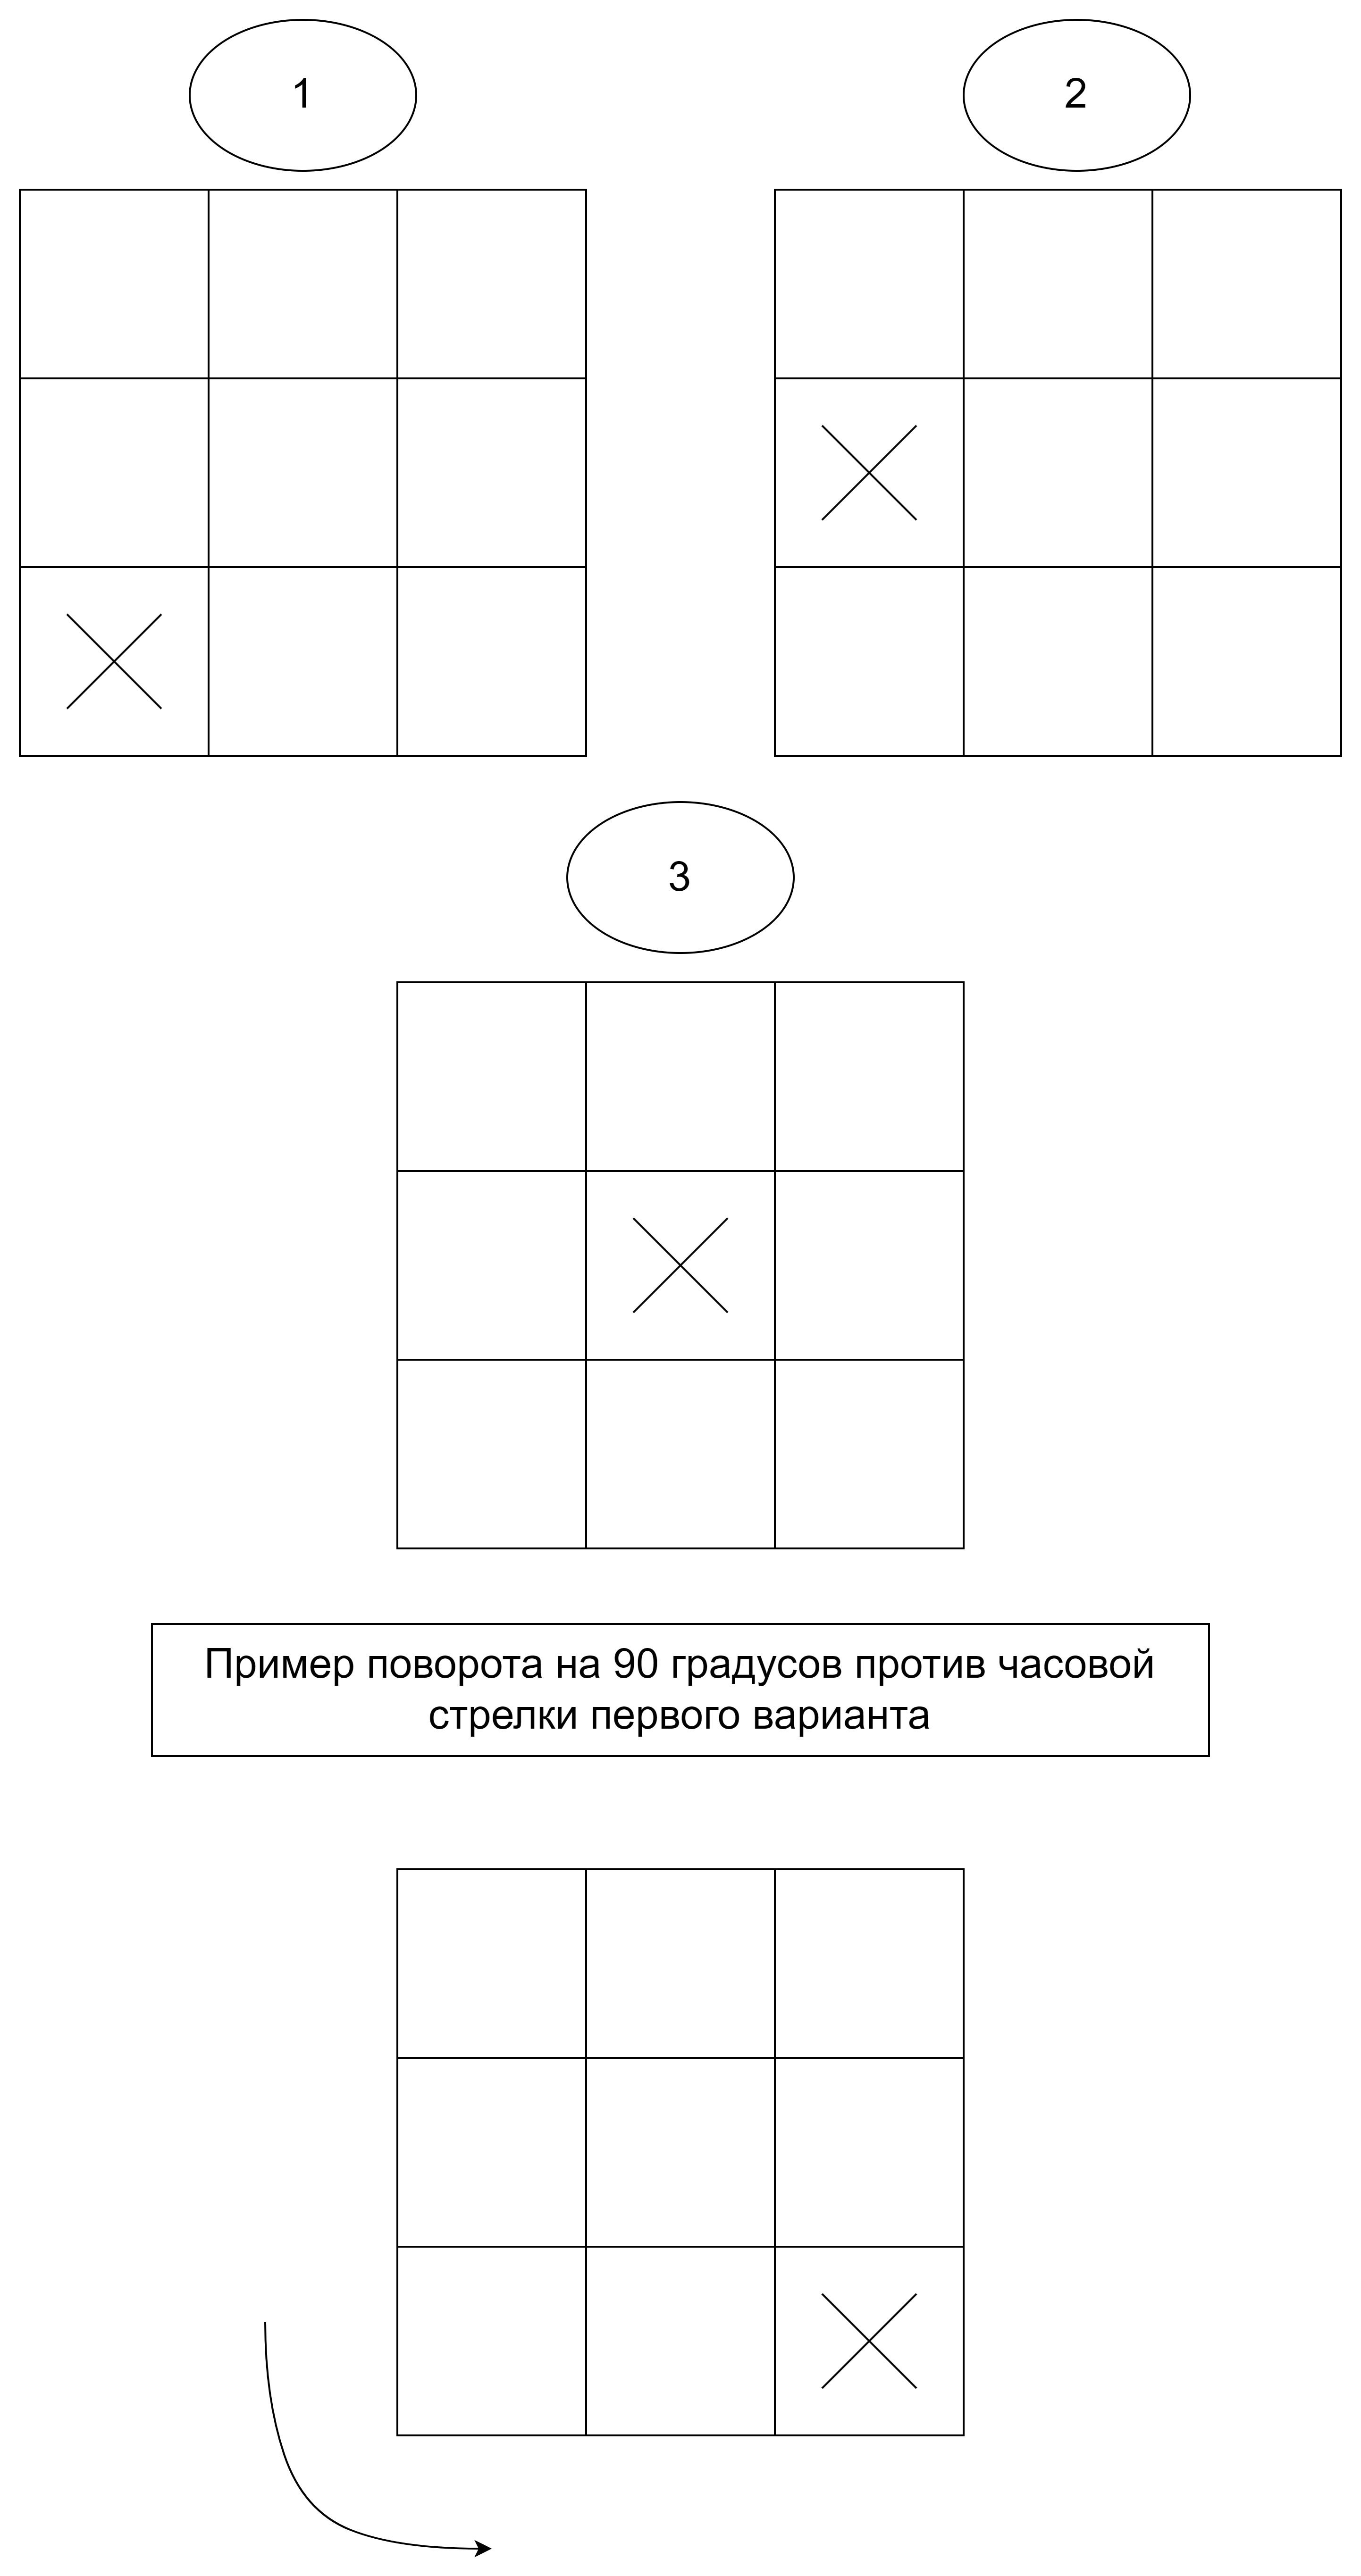

In [ ]:
df_win5_move[(df_win5_move['index_1']=='1') |
             (df_win5_move['index_4']=='1') |
             (df_win5_move['index_5']=='1') ].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_5_move
750,1,2,4,3,0,0,5,0,0,1
870,1,2,4,5,0,0,3,0,0,1
969,1,2,4,0,3,0,0,0,5,1
993,1,2,4,0,5,0,0,0,3,1
2166,1,2,0,3,4,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...
230887,0,0,0,5,1,3,2,0,4,1
230888,0,0,0,5,1,3,4,2,0,1
230889,0,0,0,5,1,3,4,0,2,1
230890,0,0,0,5,1,3,0,2,4,1


In [ ]:
df_win6_move[(~df_win6_move.index.isin(df_win5_move.index)) &
             ((df_win6_move['index_1']=='1') |
              (df_win6_move['index_4']=='1') |
              (df_win6_move['index_5']=='1'))].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_6_move
128,1,2,3,5,4,0,0,6,0,1
152,1,2,3,5,6,0,0,4,0,1
362,1,2,3,0,4,5,0,6,0,1
372,1,2,3,0,4,0,5,6,0,1
377,1,2,3,0,4,0,0,6,5,1
...,...,...,...,...,...,...,...,...,...,...
276257,0,0,6,5,1,4,0,3,2,1
276361,0,0,6,0,1,2,3,5,4,1
276364,0,0,6,0,1,2,5,3,4,1
276375,0,0,6,0,1,4,3,5,2,1


In [ ]:
df_win7_move[((~df_win7_move.index.isin(df_win6_move.index)) &
              (~df_win7_move.index.isin(df_win5_move.index))) &
             ((df_win7_move['index_1']=='1') |
              (df_win7_move['index_4']=='1') |
              (df_win7_move['index_5']=='1'))].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_7_move
0,1,2,3,4,5,6,7,0,0,1
3,1,2,3,4,5,6,0,0,7,1
13,1,2,3,4,5,0,6,0,7,1
14,1,2,3,4,5,0,7,6,0,1
15,1,2,3,4,5,0,7,0,6,1
...,...,...,...,...,...,...,...,...,...,...
322457,0,0,7,6,1,4,5,3,2,1
322459,0,0,7,6,1,5,2,4,3,1
322460,0,0,7,6,1,5,3,2,4,1
322461,0,0,7,6,1,5,3,4,2,1


In [ ]:
df_win8_move[((~df_win8_move.index.isin(df_win6_move.index)) &
              (~df_win8_move.index.isin(df_win5_move.index)) &
              (~df_win8_move.index.isin(df_win7_move.index))) &
             ((df_win8_move['index_1']=='1') |
              (df_win8_move['index_4']=='1') |
              (df_win8_move['index_5']=='1'))].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_8_move
24,1,2,3,4,6,5,7,8,0,1
30,1,2,3,4,6,7,5,8,0,1
36,1,2,3,4,6,8,5,7,0,1
37,1,2,3,4,6,8,5,0,7,1
38,1,2,3,4,6,8,7,5,0,1
...,...,...,...,...,...,...,...,...,...,...
362267,0,8,7,1,6,3,5,4,2,1
362270,0,8,7,1,6,4,3,2,5,1
362272,0,8,7,1,6,4,5,2,3,1
362276,0,8,7,1,6,5,3,2,4,1


In [ ]:
df_win9_move[((~df_win9_move.index.isin(df_win6_move.index)) &
              (~df_win9_move.index.isin(df_win5_move.index)) &
              (~df_win9_move.index.isin(df_win7_move.index)) &
              (~df_win9_move.index.isin(df_win8_move.index))) &
             ((df_win9_move['index_1']=='1') |
              (df_win9_move['index_4']=='1') |
              (df_win9_move['index_5']=='1'))]

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_9_move
2,1,2,3,4,5,6,8,7,9,1
4,1,2,3,4,5,6,9,7,8,1
6,1,2,3,4,5,7,6,8,9,1
8,1,2,3,4,5,7,8,6,9,1
10,1,2,3,4,5,7,9,6,8,1
...,...,...,...,...,...,...,...,...,...,...
362662,9,8,7,5,1,6,4,2,3,1
362762,9,8,7,6,1,2,4,3,5,1
362763,9,8,7,6,1,2,4,5,3,1
362772,9,8,7,6,1,4,2,3,5,1


In [ ]:
df_draw[(df_draw['index_1']=='1') |
        (df_draw['index_4']=='1') |
        (df_draw['index_5']=='1')]

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_9_move
7,1,2,3,4,5,7,6,9,8,0
9,1,2,3,4,5,7,8,9,6,0
18,1,2,3,4,5,9,6,7,8,0
23,1,2,3,4,5,9,8,7,6,0
25,1,2,3,4,6,5,7,9,8,0
...,...,...,...,...,...,...,...,...,...,...
362663,9,8,7,5,1,6,4,3,2,0
362767,9,8,7,6,1,3,2,5,4,0
362769,9,8,7,6,1,3,4,5,2,0
362778,9,8,7,6,1,5,2,3,4,0


Всего возможно 540 + 1656 + 17064 + 22032 + 26928 + 14976 = 83196 игр в крестики-нолики если учитывать поворот поля.

### Второй ход и зеркальное отражение.

На втором ходе нолик можно поставить в уникальные поля отмеченные зеленым, все остальные поля, производные от зеленых через зеркально отражение по диагонали для первого случая, по горизонтали для второго случая и повороты для третьего случая.

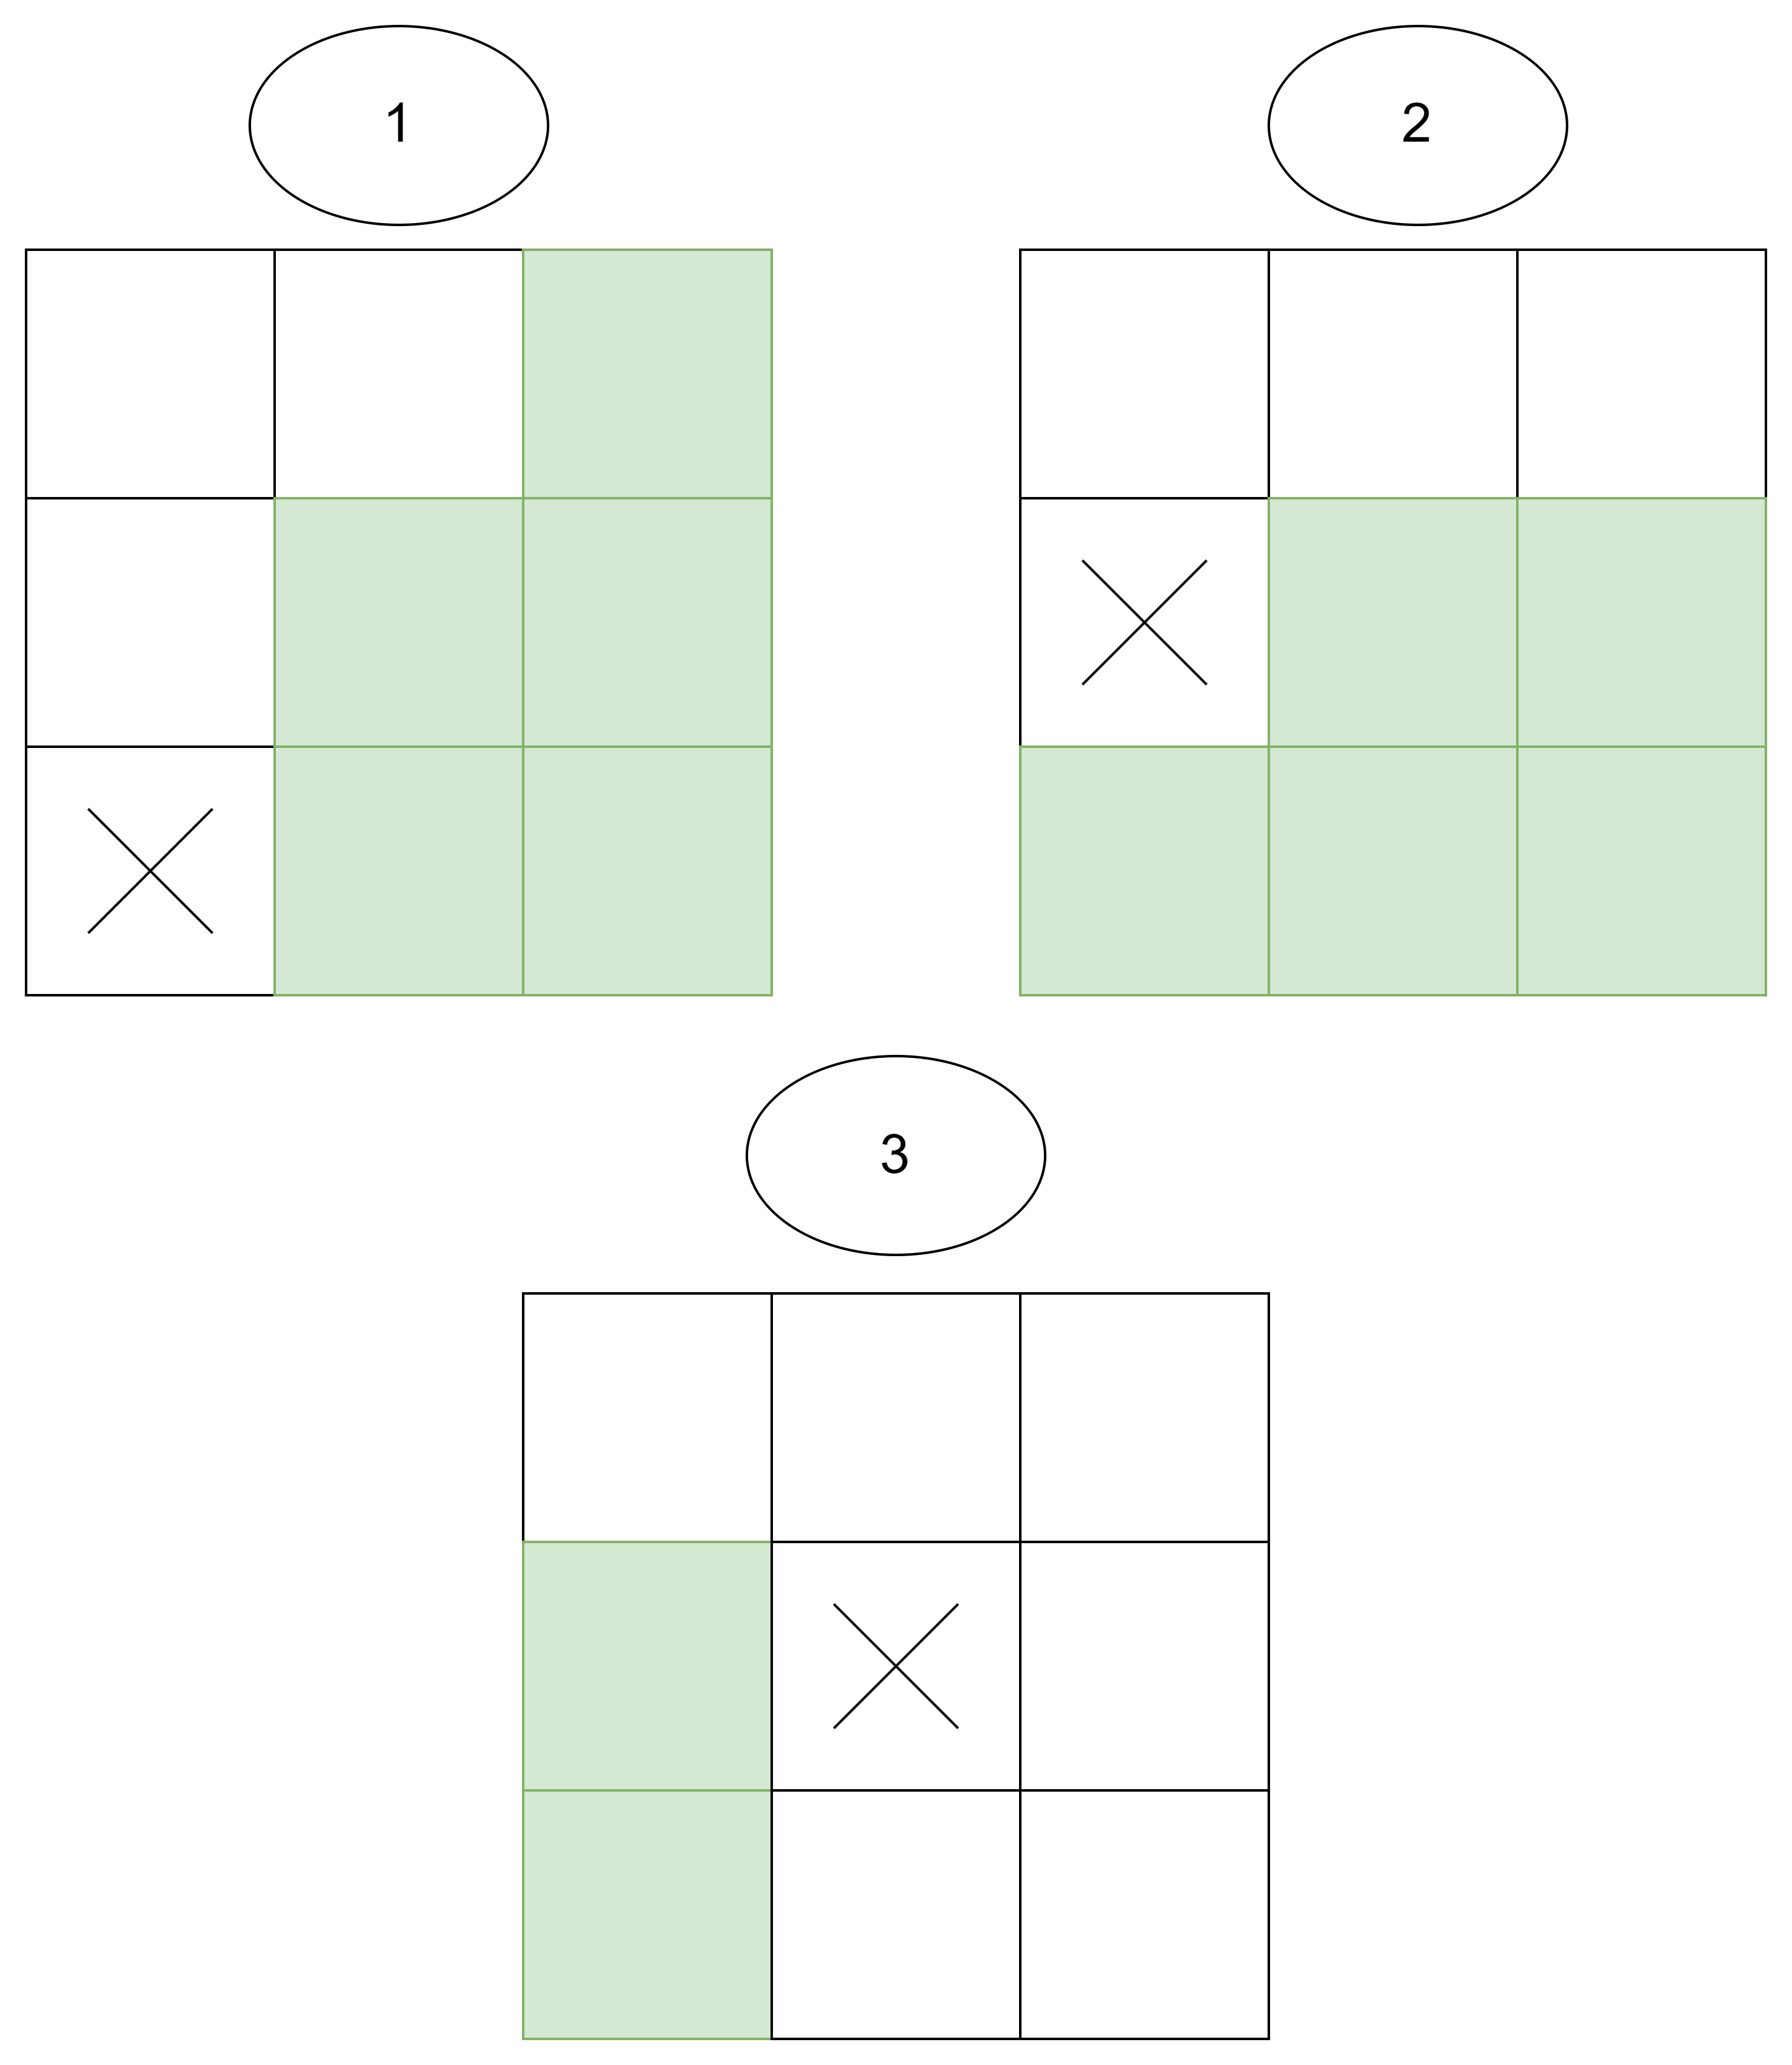

In [ ]:
df_win5_move[((df_win5_move['index_1']=='1') &
              ((df_win5_move['index_2']=='2') |
               (df_win5_move['index_3']=='2') |
               (df_win5_move['index_5']=='2') |
               (df_win5_move['index_6']=='2') |
               (df_win5_move['index_9']=='2')))  |

             ((df_win5_move['index_4']=='1') &
              ((df_win5_move['index_5']=='2') |
               (df_win5_move['index_6']=='2') |
               (df_win5_move['index_1']=='2') |
               (df_win5_move['index_2']=='2') |
               (df_win5_move['index_3']=='2'))) |

             ((df_win5_move['index_5']=='1') &
              ((df_win5_move['index_1']=='2') |
               (df_win5_move['index_4']=='2') ))].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_5_move
750,1,2,4,3,0,0,5,0,0,1
870,1,2,4,5,0,0,3,0,0,1
969,1,2,4,0,3,0,0,0,5,1
993,1,2,4,0,5,0,0,0,3,1
2166,1,2,0,3,4,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...
228374,0,0,3,2,1,0,5,4,0,1
228375,0,0,3,2,1,0,5,0,4,1
229806,0,0,5,2,1,4,3,0,0,1
229812,0,0,5,2,1,0,3,4,0,1


In [ ]:
df_win6_move[(~df_win6_move.index.isin(df_win5_move.index)) &

             (((df_win6_move['index_1']=='1') &
              ((df_win6_move['index_2']=='2') |
               (df_win6_move['index_3']=='2') |
               (df_win6_move['index_5']=='2') |
               (df_win6_move['index_6']=='2') |
               (df_win6_move['index_9']=='2')))  |

             ((df_win6_move['index_4']=='1') &
              ((df_win6_move['index_5']=='2') |
               (df_win6_move['index_6']=='2') |
               (df_win6_move['index_1']=='2') |
               (df_win6_move['index_2']=='2') |
               (df_win6_move['index_3']=='2'))) |

             ((df_win6_move['index_5']=='1') &
              ((df_win6_move['index_1']=='2') |
               (df_win6_move['index_4']=='2'))))].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_6_move
128,1,2,3,5,4,0,0,6,0,1
152,1,2,3,5,6,0,0,4,0,1
362,1,2,3,0,4,5,0,6,0,1
372,1,2,3,0,4,0,5,6,0,1
377,1,2,3,0,4,0,0,6,5,1
...,...,...,...,...,...,...,...,...,...,...
275789,0,0,6,1,3,2,0,5,4,1
275833,0,0,6,1,5,2,3,0,4,1
275836,0,0,6,1,5,2,0,3,4,1
275857,0,0,6,1,0,2,3,5,4,1


In [ ]:
df_win7_move[((~df_win7_move.index.isin(df_win6_move.index)) &
              (~df_win7_move.index.isin(df_win5_move.index))) &

             (((df_win7_move['index_1']=='1') &
              ((df_win7_move['index_2']=='2') |
               (df_win7_move['index_3']=='2') |
               (df_win7_move['index_5']=='2') |
               (df_win7_move['index_6']=='2') |
               (df_win7_move['index_9']=='2')))  |

             ((df_win7_move['index_4']=='1') &
              ((df_win7_move['index_5']=='2') |
               (df_win7_move['index_6']=='2') |
               (df_win7_move['index_1']=='2') |
               (df_win7_move['index_2']=='2') |
               (df_win7_move['index_3']=='2'))) |

             ((df_win7_move['index_5']=='1') &
              ((df_win7_move['index_1']=='2') |
               (df_win7_move['index_4']=='2'))))].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_7_move
0,1,2,3,4,5,6,7,0,0,1
3,1,2,3,4,5,6,0,0,7,1
13,1,2,3,4,5,0,6,0,7,1
14,1,2,3,4,5,0,7,6,0,1
15,1,2,3,4,5,0,7,0,6,1
...,...,...,...,...,...,...,...,...,...,...
321977,0,0,7,2,1,5,6,4,3,1
321978,0,0,7,2,1,6,3,4,5,1
321979,0,0,7,2,1,6,3,5,4,1
321982,0,0,7,2,1,6,5,3,4,1


In [ ]:
df_win8_move[((~df_win8_move.index.isin(df_win6_move.index)) &
              (~df_win8_move.index.isin(df_win5_move.index)) &
              (~df_win8_move.index.isin(df_win7_move.index))) &

             (((df_win8_move['index_1']=='1') &
              ((df_win8_move['index_2']=='2') |
               (df_win8_move['index_3']=='2') |
               (df_win8_move['index_5']=='2') |
               (df_win8_move['index_6']=='2') |
               (df_win8_move['index_9']=='2')))  |

             ((df_win8_move['index_4']=='1') &
              ((df_win8_move['index_5']=='2') |
               (df_win8_move['index_6']=='2') |
               (df_win8_move['index_1']=='2') |
               (df_win8_move['index_2']=='2') |
               (df_win8_move['index_3']=='2'))) |

             ((df_win8_move['index_5']=='1') &
              ((df_win8_move['index_1']=='2') |
               (df_win8_move['index_4']=='2'))))].drop_duplicates()

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_8_move
24,1,2,3,4,6,5,7,8,0,1
30,1,2,3,4,6,7,5,8,0,1
36,1,2,3,4,6,8,5,7,0,1
37,1,2,3,4,6,8,5,0,7,1
38,1,2,3,4,6,8,7,5,0,1
...,...,...,...,...,...,...,...,...,...,...
362183,0,8,7,1,2,6,5,4,3,1
362209,0,8,7,1,4,2,3,6,5,1
362211,0,8,7,1,4,2,5,6,3,1
362256,0,8,7,1,6,2,3,4,5,1


In [ ]:
df_win9_move[((~df_win9_move.index.isin(df_win6_move.index)) &
              (~df_win9_move.index.isin(df_win5_move.index)) &
              (~df_win9_move.index.isin(df_win7_move.index)) &
              (~df_win9_move.index.isin(df_win8_move.index))) &

             (((df_win9_move['index_1']=='1') &
              ((df_win9_move['index_2']=='2') |
               (df_win9_move['index_3']=='2') |
               (df_win9_move['index_5']=='2') |
               (df_win9_move['index_6']=='2') |
               (df_win9_move['index_9']=='2')))  |

             ((df_win9_move['index_4']=='1') &
              ((df_win9_move['index_5']=='2') |
               (df_win9_move['index_6']=='2') |
               (df_win9_move['index_1']=='2') |
               (df_win9_move['index_2']=='2') |
               (df_win9_move['index_3']=='2'))) |

             ((df_win9_move['index_5']=='1') &
              ((df_win9_move['index_1']=='2') |
               (df_win9_move['index_4']=='2'))))]

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_9_move
2,1,2,3,4,5,6,8,7,9,1
4,1,2,3,4,5,6,9,7,8,1
6,1,2,3,4,5,7,6,8,9,1
8,1,2,3,4,5,7,8,6,9,1
10,1,2,3,4,5,7,9,6,8,1
...,...,...,...,...,...,...,...,...,...,...
362260,9,8,7,1,6,2,5,3,4,1
362290,9,8,7,2,1,4,6,3,5,1
362291,9,8,7,2,1,4,6,5,3,1
362300,9,8,7,2,1,6,4,3,5,1


In [ ]:
df_draw[((df_draw['index_1']=='1') &
         ((df_draw['index_2']=='2') |
          (df_draw['index_3']=='2') |
          (df_draw['index_5']=='2') |
          (df_draw['index_6']=='2') |
          (df_draw['index_9']=='2')))  |

         ((df_draw['index_4']=='1') &
          ((df_draw['index_5']=='2') |
           (df_draw['index_6']=='2') |
           (df_draw['index_1']=='2') |
           (df_draw['index_2']=='2') |
           (df_draw['index_3']=='2'))) |

         ((df_draw['index_5']=='1') &
          ((df_draw['index_1']=='2') |
           (df_draw['index_4']=='2')))]

,index_1,index_2,index_3,index_4,index_5,index_6,index_7,index_8,index_9,win_9_move
7,1,2,3,4,5,7,6,9,8,0
9,1,2,3,4,5,7,8,9,6,0
18,1,2,3,4,5,9,6,7,8,0
23,1,2,3,4,5,9,8,7,6,0
25,1,2,3,4,6,5,7,9,8,0
...,...,...,...,...,...,...,...,...,...,...
362259,9,8,7,1,6,2,4,5,3,0
362280,9,8,7,2,1,3,4,5,6,0
362285,9,8,7,2,1,3,6,5,4,0
362294,9,8,7,2,1,5,4,3,6,0


Всего возможно 240 + 888 + 7920 + 11952 + 13536 + 8064 = 42600 игр в крестики-нолики если учитывать поворот поля на первом ходе и зеркальное отражение на втором ходе.